In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# read in data
data = pd.read_csv('Datasets/admissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


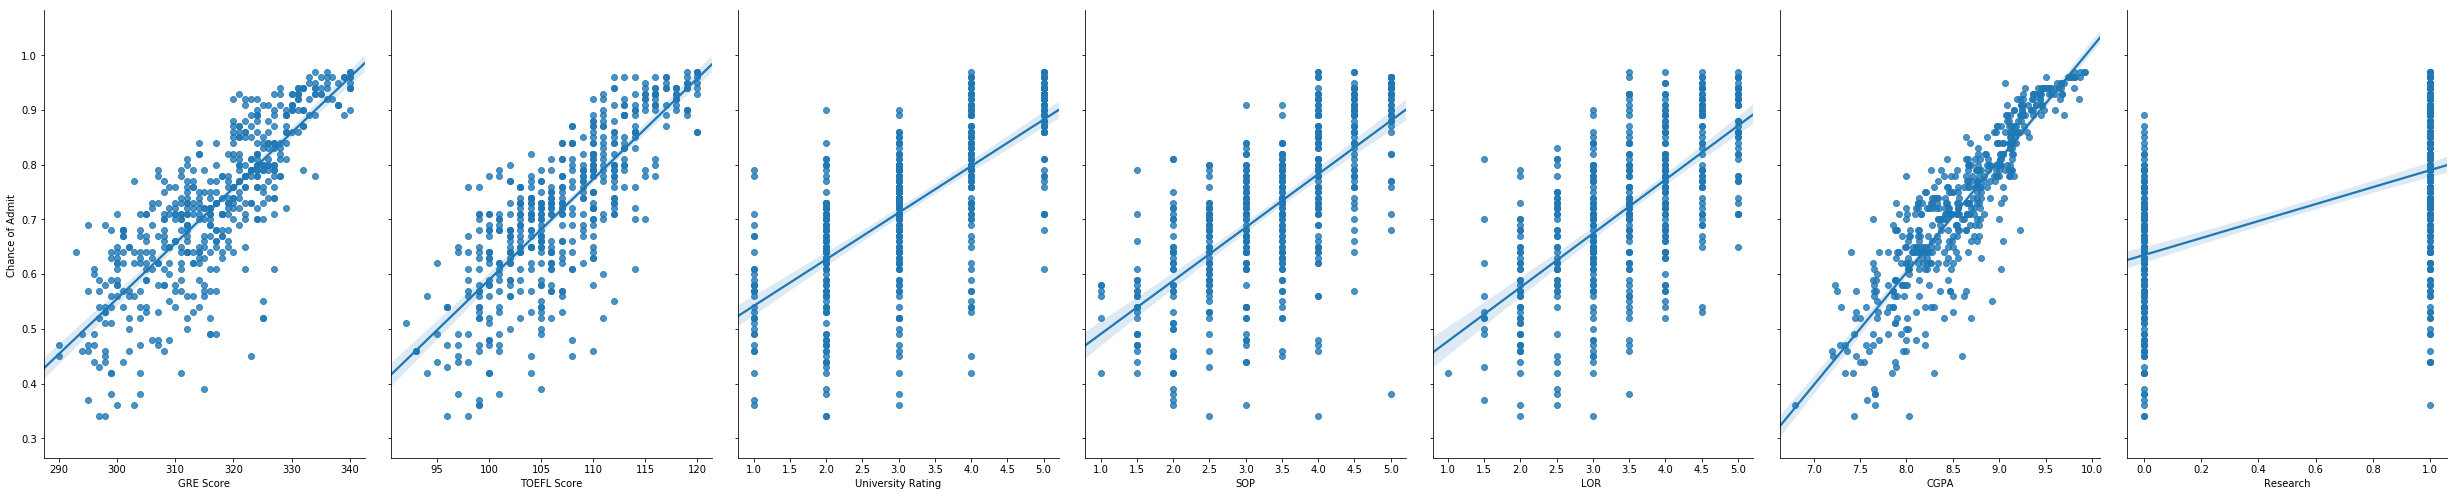

In [7]:
# sisualize the relationship between features and response
%matplotlib inline

sns.pairplot(data, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'], y_vars='Chance of Admit ', height=7, aspect=0.7, kind='reg')

In [8]:
# preparing X and y
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = data[feature_cols]
y = data['Chance of Admit ']

# split X and y into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Linear Regression

In [22]:
linreg = LinearRegression()

# fit the model to the training data (learn coefficients)
linreg.fit(X_train, y_train)

# pair the features with the coefficients
zipped = list(zip(feature_cols, linreg.coef_))
print(zipped)

# make predictions on the test set
y_pred = linreg.predict(X_test)

[('GRE Score', 0.0017285515258232257), ('TOEFL Score', 0.003892695782114683), ('University Rating', 0.0045000413014039614), ('SOP', 0.004727358123754478), ('LOR ', 0.013066606149474967), ('CGPA', 0.10917373896157209), ('Research', 0.02627981347495844)]
[0.79974661]


### Model Evaluation

In [13]:
# Computing MAE for our Admissions predictions
print(metrics.mean_absolute_error(y_test, y_pred))

0.042205820533755906


In [14]:
# Computing MSE for our Sales predictions
print(metrics.mean_squared_error(y_test, y_pred))

0.0038171542923579995


In [16]:
# RMSE using sk-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.06178312303823755


### Cross-validation

In [18]:
# 10-fold CV
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(mse_scores.mean())
print(rmse_scores.mean())

0.003829634013696149
0.05822549847657752
